<a href="https://colab.research.google.com/github/tommasMeeussen/KR-KP-A7/blob/main/Chess_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pycaret

     |████████████████████████████████| 288 kB 8.9 MB/s 
     |████████████████████████████████| 2.0 MB 22.2 MB/s 
     |████████████████████████████████| 6.8 MB 17.1 MB/s 
     |████████████████████████████████| 261 kB 65.9 MB/s 
     |████████████████████████████████| 86 kB 7.9 MB/s 
     |████████████████████████████████| 1.3 MB 59.5 MB/s 
     |████████████████████████████████| 167 kB 82.8 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 15.5 MB 67.8 MB/s 
     |████████████████████████████████| 113 kB 68.1 MB/s 
     |████████████████████████████████| 1.7 MB 63.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.1 MB 43.6 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 102 kB 14.5 MB/s 
     |███████████████████

In [1]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!
Sun Dec 12 17:40:59 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
    

In [4]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [5]:
from pycaret.datasets import get_data
import pandas as pd

In [8]:
#data = pd.read_csv("kr-vs-kp.data", header= None, sep=",", names=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35", "36"])
data = pd.read_csv("kr-vs-kp.data", header= None, sep=",", names=["bkblk","bknwy","bkon8","bkona","bkspr","bkxbq","bkxcr","bkxwp","blxwp","bxqsq","cntxt","dsopp","dwipd",
 "hdchk","katri","mulch","qxmsq","r2ar8","reskd","reskr","rimmx","rkxwp","rxmsq","simpl","skach","skewr",
 "skrxp","spcop","stlmt","thrsk","wkcti","wkna8","wknck","wkovl","wkpos","wtoeg", "win"]);
data.head()



,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,cntxt,dsopp,dwipd,hdchk,katri,mulch,qxmsq,r2ar8,reskd,reskr,rimmx,rkxwp,rxmsq,simpl,skach,skewr,skrxp,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,win
0,f,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,f,f,l,f,n,f,f,t,f,f,f,t,f,f,f,t,f,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,t,f,t,f,f,f,f,f,f,f,t,t,n,won


In [ ]:
data.shape

(3196, 37)

In [ ]:
from pycaret.classification import *

In [ ]:
krkp_A = setup(data = data, target ="36" , session_id=123) 

,Description,Value
0,session_id,123
1,Target,36
2,Target Type,Binary
3,Label Encoded,"nowin: 0, won: 1"
4,Original Data,"(3196, 37)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,36
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9942,0.9995,0.9940,0.9949,0.9944,0.9884,0.9884,0.060
dt,Decision Tree Classifier,0.9924,0.9922,0.9966,0.9891,0.9928,0.9848,0.9849,0.009
et,Extra Trees Classifier,0.9911,0.9985,0.9948,0.9882,0.9915,0.9821,0.9822,0.291
rf,Random Forest Classifier,0.9893,0.9990,0.9923,0.9873,0.9897,0.9785,0.9786,0.299
gbc,Gradient Boosting Classifier,0.9727,0.9980,0.9674,0.9802,0.9736,0.9454,0.9458,0.098
ada,Ada Boost Classifier,0.9642,0.9948,0.9656,0.9662,0.9657,0.9283,0.9287,0.062
svm,SVM - Linear Kernel,0.9629,0.0000,0.9511,0.9777,0.9638,0.9258,0.9269,0.010
lr,Logistic Regression,0.9557,0.9920,0.9536,0.9614,0.9574,0.9114,0.9117,0.244
knn,K Neighbors Classifier,0.9486,0.9839,0.9622,0.9411,0.9513,0.8969,0.8976,0.075
lda,Linear Discriminant Analysis,0.9396,0.9842,0.9485,0.9369,0.9425,0.8790,0.8794,0.012


In [ ]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
#decision tree
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9911,0.9911,0.9914,0.9914,0.9914,0.9821,0.9821
1,0.9821,0.9818,0.9914,0.9746,0.9829,0.9642,0.9644
2,0.9911,0.9907,1.0000,0.9832,0.9915,0.9821,0.9823
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9911,0.9907,1.0000,0.9832,0.9915,0.9821,0.9823
5,0.9911,0.9907,1.0000,0.9832,0.9915,0.9821,0.9823
6,0.9866,0.9860,1.0000,0.9750,0.9873,0.9731,0.9735
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9955,0.9957,0.9914,1.0000,0.9957,0.9910,0.9911
9,0.9955,0.9957,0.9914,1.0000,0.9957,0.9910,0.9911


In [ ]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [ ]:
#KNN
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9554,0.9843,0.9655,0.9492,0.9573,0.9105,0.9107
1,0.9286,0.9782,0.9741,0.8968,0.9339,0.8565,0.8600
2,0.9688,0.9932,0.9658,0.9741,0.9700,0.9374,0.9374
3,0.9554,0.9870,0.9573,0.9573,0.9573,0.9105,0.9105
4,0.9464,0.9770,0.9658,0.9339,0.9496,0.8925,0.8930
5,0.9286,0.9782,0.9573,0.9106,0.9333,0.8565,0.8578
6,0.9420,0.9748,0.9573,0.9333,0.9451,0.8836,0.8839
7,0.9552,0.9892,0.9483,0.9649,0.9565,0.9102,0.9104
8,0.9641,0.9869,0.9914,0.9426,0.9664,0.9280,0.9293
9,0.9417,0.9906,0.9397,0.9478,0.9437,0.8833,0.8833


In [ ]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
#Random Forest
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9732,0.9985,0.9741,0.9741,0.9741,0.9464,0.9464
1,0.9955,0.9997,0.9914,1.0000,0.9957,0.9911,0.9911
2,0.9911,0.9993,0.9915,0.9915,0.9915,0.9821,0.9821
3,0.9911,0.9993,1.0000,0.9832,0.9915,0.9821,0.9823
4,0.9955,0.9982,1.0000,0.9915,0.9957,0.9911,0.9911
5,0.9821,0.9989,0.9915,0.9748,0.9831,0.9642,0.9643
6,0.9911,0.9967,0.9915,0.9915,0.9915,0.9821,0.9821
7,0.9955,1.0000,0.9914,1.0000,0.9957,0.9910,0.9911
8,0.9910,1.0000,1.0000,0.9831,0.9915,0.9820,0.9822
9,0.9865,0.9995,0.9914,0.9829,0.9871,0.9730,0.9731


In [ ]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [ ]:
#Best model from test
lgbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9955,1.0000,0.9914,1.0000,0.9957,0.9911,0.9911
2,0.9866,0.9995,0.9829,0.9914,0.9871,0.9732,0.9732
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9955,0.9996,1.0000,0.9915,0.9957,0.9911,0.9911
5,0.9866,0.9993,0.9915,0.9831,0.9872,0.9732,0.9732
6,0.9821,0.9963,0.9829,0.9829,0.9829,0.9642,0.9642
7,0.9955,1.0000,0.9914,1.0000,0.9957,0.9910,0.9911
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


<h1>Tuning models<h1>


In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9330,0.9911,0.9397,0.9316,0.9356,0.8659,0.8659
1,0.9286,0.9885,1.0000,0.8788,0.9355,0.8562,0.8652
2,0.9375,0.9893,0.9060,0.9725,0.9381,0.8751,0.8774
3,0.9241,0.9889,0.9060,0.9464,0.9258,0.8482,0.8491
4,0.9152,0.9772,0.9145,0.9224,0.9185,0.8301,0.8301
5,0.9196,0.9883,0.9915,0.8722,0.9280,0.8379,0.8468
6,0.9107,0.9850,0.9402,0.8943,0.9167,0.8206,0.8218
7,0.9327,0.9914,0.8793,0.9903,0.9315,0.8659,0.8718
8,0.9462,0.9921,0.9569,0.9407,0.9487,0.8921,0.8923
9,0.9238,0.9922,0.8707,0.9806,0.9224,0.8480,0.8538


In [ ]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [ ]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9286,0.9778,0.9914,0.8846,0.9350,0.8563,0.8632
1,0.9152,0.9817,0.9741,0.8760,0.9224,0.8294,0.8351
2,0.9286,0.9825,0.9573,0.9106,0.9333,0.8565,0.8578
3,0.9464,0.9809,0.9744,0.9268,0.9500,0.8924,0.8937
4,0.9286,0.9807,0.9487,0.9174,0.9328,0.8566,0.8572
5,0.9241,0.9876,0.9829,0.8846,0.9312,0.8471,0.8530
6,0.9152,0.9742,0.9658,0.8828,0.9224,0.8293,0.8333
7,0.9731,0.9955,0.9741,0.9741,0.9741,0.9461,0.9461
8,0.9283,0.9836,0.9569,0.9098,0.9328,0.8560,0.8572
9,0.9507,0.9897,0.9483,0.9565,0.9524,0.9012,0.9013


In [ ]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=19, p=2,
                     weights='uniform')


In [ ]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9643,0.9934,0.9741,0.9576,0.9658,0.9284,0.9286
1,0.9464,0.9932,0.9741,0.9262,0.9496,0.8925,0.8938
2,0.9330,0.9923,0.9487,0.9250,0.9367,0.8656,0.8660
3,0.9464,0.9931,0.9829,0.9200,0.9504,0.8923,0.8946
4,0.9375,0.9927,0.9744,0.9120,0.9421,0.8743,0.8766
5,0.9375,0.9915,0.9915,0.8992,0.9431,0.8741,0.8793
6,0.9196,0.9852,0.9402,0.9091,0.9244,0.8387,0.8392
7,0.9372,0.9941,0.9483,0.9322,0.9402,0.8741,0.8743
8,0.9552,0.9961,0.9741,0.9417,0.9576,0.9100,0.9106
9,0.9417,0.9908,0.9310,0.9558,0.9432,0.8833,0.8837


<h1>AUC Plot</h1>

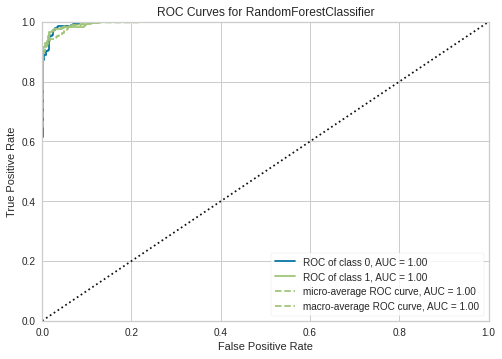

In [ ]:
plot_model(tuned_rf, plot = 'auc')

<h1>Precision-Recall Curve</h1>

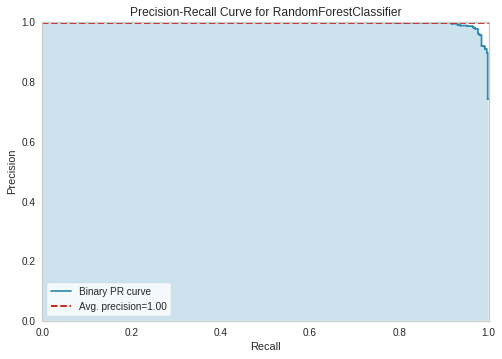

In [ ]:
plot_model(tuned_rf, plot = 'pr')

<h1> Feature Importance Plot</h1>

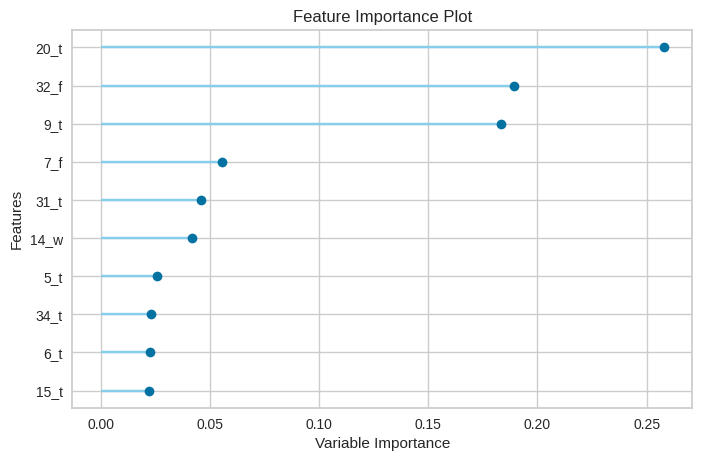

In [ ]:
plot_model(tuned_rf, plot='feature')

<h1>Confusion Matrix</h1>

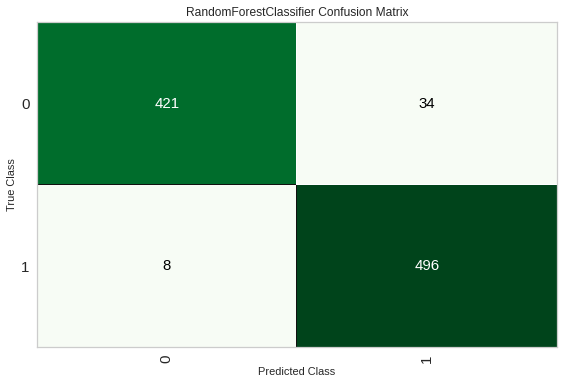

In [ ]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9562,0.9963,0.9841,0.9358,0.9594,0.9119,0.9133


In [ ]:
predict_model(lgbm);


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9906,0.9998,0.9921,0.9901,0.9911,0.9812,0.9812
